**Import Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install the Dataset from Kaggle**

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Kaggle"

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!ls
!unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

**Detecting Malaria**

In [ ]:
from __future__ import absolute_import, division, print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
print(os.listdir("../content/cell_images/cell_images"))

['Uninfected', 'Parasitized']


In [ ]:
folder_parasitized = '/content/cell_images/cell_images/Parasitized/'
folder_uninfected = '/content/cell_images/cell_images/Uninfected/'

print(len(os.listdir(folder_parasitized)))
print(len(os.listdir(folder_uninfected)))

13780
13780


In [ ]:
infected = os.listdir('../content/cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('../content/cell_images/cell_images/Uninfected/')

**Data Preperation**

In [ ]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("../content/cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("../content/cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')
        
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

print('Cells : {} | Labels : {}'.format(cells.shape , labels.shape))



Cells : (96453, 50, 50, 3) | Labels : (96453,)


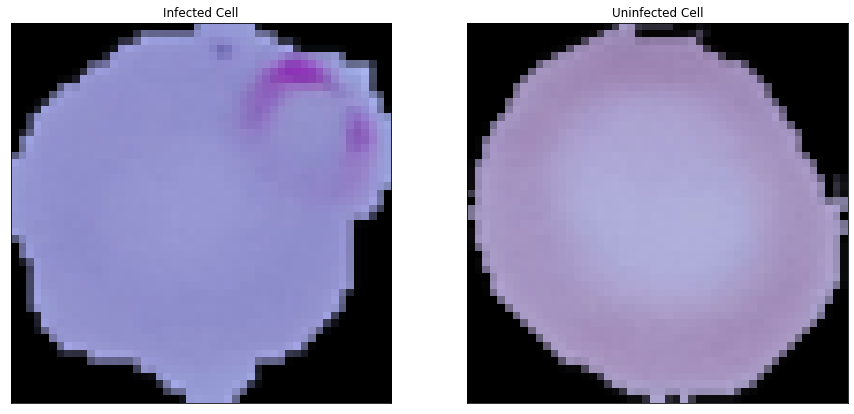

In [ ]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
import fnmatch
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

**Data Augmentation**

In [ ]:
img_shape = (50, 50, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

**Data Spliting**

In [ ]:
train_datagen = image_gen.flow_from_directory('../content/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode = 'rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'training',
                                     shuffle = True)

validation_datagen = image_gen.flow_from_directory('../content/cell_images/cell_images',
                                     target_size = img_shape[:2],
                                     color_mode ='rgb',
                                     batch_size = 32,
                                     class_mode = 'binary',
                                     subset = 'validation',
                                     shuffle = False)
num_of_train_samples = len(train_datagen)
num_of_test_samples = 600

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


**CNN Architecture**

In [ ]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=(50,50,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          1

**Compile the Model**

In [ ]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
filepath = 'my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

Model Callbacks

In [ ]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')

In [ ]:
callbacks = [checkpoint, early_stopping]

**Model Fiting**

In [ ]:
history=model.fit_generator(generator=train_datagen,steps_per_epoch=len(train_datagen),
                          epochs=15,validation_data=validation_datagen,
                          validation_steps=len(validation_datagen),
                          callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
689/689 [==============================] - 72s 81ms/step - loss: 0.6910 - accuracy: 0.5365 - val_loss: 0.6915 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69154, saving model to my_best_model.epoch01-loss0.69.hdf5
Epoch 2/15
689/689 [==============================] - 55s 80ms/step - loss: 0.6732 - accuracy: 0.6006 - val_loss: 0.6936 - val_accuracy: 0.5013

Epoch 00002: val_loss did not improve from 0.69154
Epoch 3/15
689/689 [==============================] - 55s 80ms/step - loss: 0.6561 - accuracy: 0.6214 - val_loss: 0.6835 - val_accuracy: 0.5134

Epoch 00003: val_loss improved from 0.69154 to 0.68349, saving model to my_best_model.epoch03-loss0.68.hdf5
Epoch 4/15
689/689 [==============================] - 55s 80ms/step - loss: 0.6111 - accuracy: 0.6828 - val_loss: 0.5021 - val_accuracy: 0.8134

Epoch 00004: val_loss improved from 0.68349 to 0.50209, saving model to my_best_model.epoch04-loss0.50.hdf5
Epoch 5/15
689/689 [=============================

**Plots for Accuracy and Loss**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

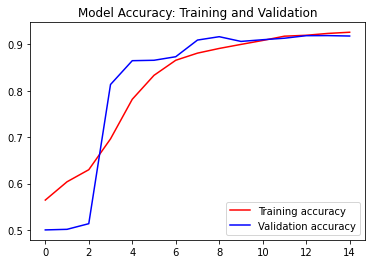

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Model Accuracy: Training and Validation')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

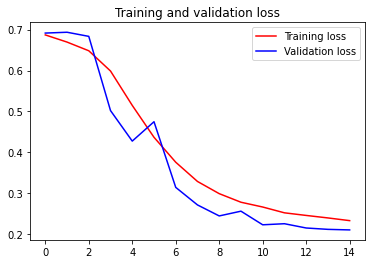

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

**Model Evaluation**

In [ ]:
saved_model = tf.keras.models.load_model('my_best_model.epoch15-loss0.21.hdf5')

In [ ]:
model_test_performace = saved_model.evaluate(validation_datagen)

173/173 [==============================] - 11s 64ms/step - loss: 0.2119 - accuracy: 0.9196


In [ ]:
test_accuracy = model_test_performace[1]

print(f'Test accuracy: {round(test_accuracy*100, 2)}%')

Test accuracy: 91.96%


**Data Prediction**

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np

In [ ]:
def predict(img):
    x = image.img_to_array(img)
    x = x/255.0
    x = np.expand_dims(x,axis=0)
    y = model.predict(x)
    return y

Predicted: [[0.9179589]]


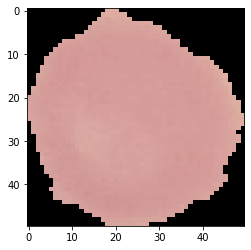

In [ ]:
img=image.load_img('/content/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144348_cell_125.png', target_size=(50, 50))
plt.imshow(img)
print("Predicted:", predict(img))

Predicted: [[0.00012605]]


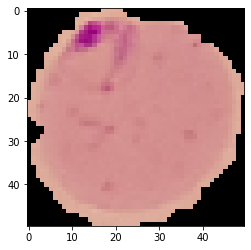

In [ ]:
img=image.load_img('/content/cell_images/cell_images/Parasitized/C101P62ThinF_IMG_20150918_151239_cell_83.png', target_size=(50, 50))
plt.imshow(img)
print("Predicted:", predict(img))